# 배치 정규화 풀이

In [ ]:
import torch
x = torch.FloatTensor([
    [-0.6577,-0.5797, 0.6360],
    [0.7392, 0.2145, 1.523],
    [0.2432,0.5662, 0.322]
])

In [ ]:
#배치 정규화수행
import torch
from torch import nn
x= torch.FloatTensor(
    [
       [-0.6577,-0.5797, 0.6360],
    [0.7392, 0.2145, 1.523],
    [0.2432,0.5662, 0.322]
    ]
)

print(nn.BatchNorm1d(3)(x))

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
#가중치 초기화 함수
from torch import nn

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Linear(1,2),
        nn.Sigmoid()

        )
    self.fc = nn.Linear(2,1)
    self._init_weights()

  def _init_weights(self):
    nn.init.xavier_uniform_(self.layer[0].weight)
    self.layer[0].bias.data.fill_(0.01)

    nn.init.xavier_uniform_(self.fc.weight)
    self.fc.bias.data.fill_(0.01)
model=Net()

In [ ]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)

        # 모델의 모든 레이어에 대해 가중치 초기화 적용
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):  # nn.Linear 레이어에만 초기화 적용
            nn.init.xavier_uniform_(module.weight)  # Xavier 가중치 초기화
            nn.init.constant_(module.bias, 0.01)    # 편향은 0.01로 초기화
        print(f"Apply: {module}")

model = Net()


Apply: Linear(in_features=1, out_features=2, bias=True)
Apply: Sigmoid()
Apply: Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply: Linear(in_features=2, out_features=1, bias=True)
Apply: Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
#L1
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

In [ ]:
#L2
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l2_loss

In [ ]:
#가중치 감쇠
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

In [ ]:
#드롭아웃
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [ ]:
!pip install numpy requests nlpaug transformers sacremoses nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 27.9 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : all those humans who can imagine anything, can also create the infinitely impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : we originally can only see about a short enough distance ahead, but now we can see plenty up there that maybe needs to be something done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : if only a theoretical machine is not expected to always be entirely infallible, it cannot also always be intelligent.
------------------


In [ ]:
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Tse who can iman ythig, can crae the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can oy see a hot itace hea, but we can see plnt there that eds to be de.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a chin is peted to be infllbe, it cant lo be intelligent.
------------------


In [ ]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those can imagine who anything, can impossible create the.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : Can we only see a short distance, ahead we but can see there that plenty needs be to. done
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to infallible be, it cannot be intelligent also.
------------------


In [ ]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


src : Those who can imagine anything, can create the impossible.
dst : Those who buns think anything, bottom create the unimaginable.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only see a short distance ahead, but we can visualize plenty there that involve to embody arrange.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is carry to be infallible, it cannot likewise comprise intelligent.
------------------


In [ ]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who cannot imagine anything, can't create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We could only see a short distance ahead, but we cannot see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it can't also be intelligent.
------------------


In [ ]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : Anyone who can imagine anything can achieve the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only look a little ahead, but we can see a lot there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it cannot be intelligent.
------------------


In [ ]:
!pip install imgaug


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d s076923/pytorch-transformer

Dataset URL: https://www.kaggle.com/datasets/s076923/pytorch-transformer
License(s): other
 99% 911M/916M [00:16<00:00, 60.4MB/s]
100% 916M/916M [00:16<00:00, 57.0MB/s]


In [ ]:
import shutil

shutil.unpack_archive(
    filename="pytorch-transformer.zip",
    extract_dir="./", # 현재 경로는 pytorchtrf로 가정합니다.
    format="zip"
)

torch.Size([3, 512, 512])


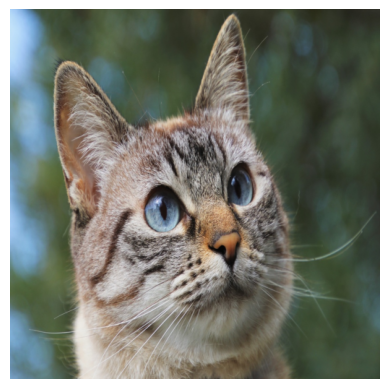

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# 변환 정의
transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

# 이미지 열기
image = Image.open("/content/datasets/images/cat.jpg")

# 변환 적용
transformed_image = transform(image)
print(transformed_image.shape)  # (C, H, W)

# 텐서를 NumPy 배열로 변환하고 차원 변경
transformed_image = transformed_image.permute(1, 2, 0).numpy()  # (C, H, W) -> (H, W, C)

# 이미지 표시
plt.imshow(transformed_image)
plt.axis('off')  # 축 숨기기
plt.show()


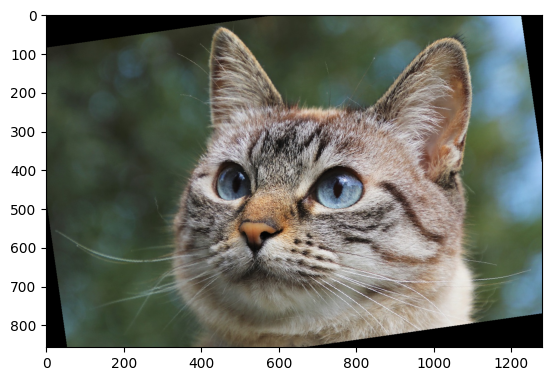

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

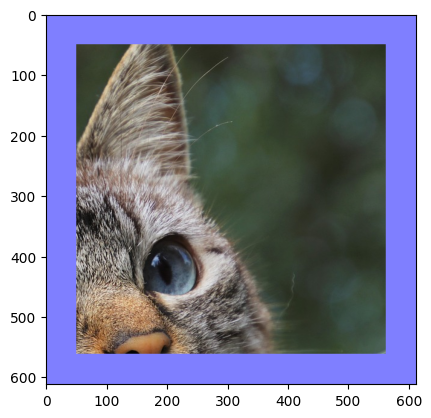

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

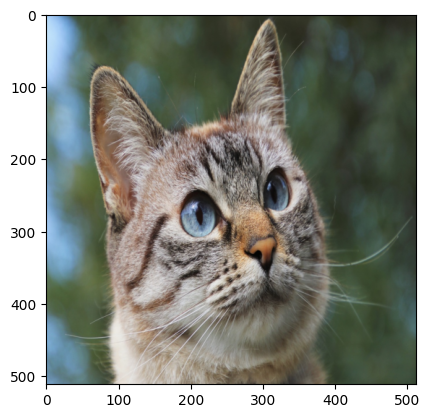

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

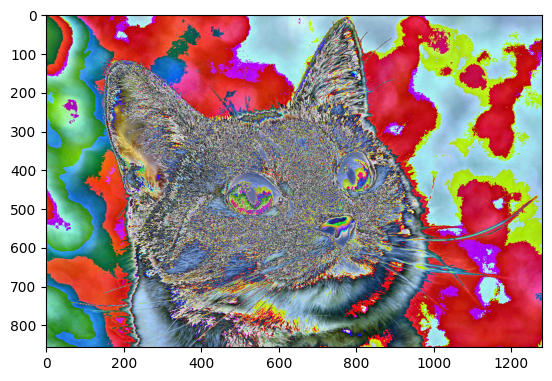

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

(857, 1280, 3) uint8


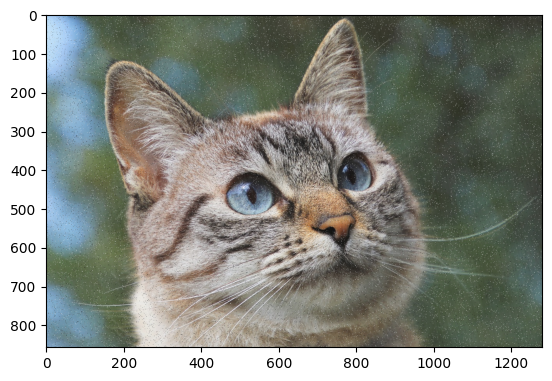

In [ ]:
import numpy as np
np.bool = np.bool_ # Deprecated 오류 방지
from PIL import Image
from torchvision import transforms
from imgaug import augmenters as iaa


class IaaTransforms:
    def __init__(self):
        self.seq = iaa.Sequential([
            iaa.SaltAndPepper(p=(0.03, 0.07)),
            iaa.Rain(speed=(0.3, 0.7))
        ])

    def __call__(self, images):
        images = np.array(images)
        print(images.shape, images.dtype)
        augmented = self.seq.augment_image(images)
        return Image.fromarray(augmented)


transform = transforms.Compose([
    IaaTransforms()
])

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

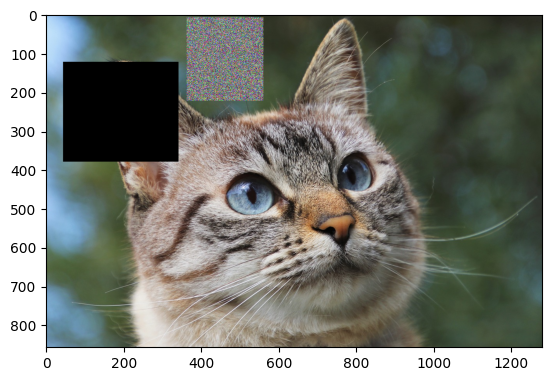

In [ ]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

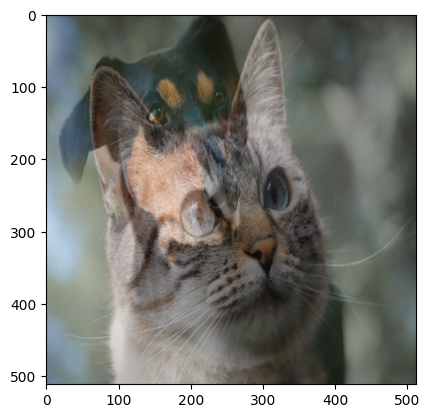

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms


class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        image = np.array(image)
        target = self.target.resize(self.scale)
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))


transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("/content/datasets/images/dog.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)

image = Image.open("/content/datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)